## Low level API for generate HTML maps

The higher level API from generating HTML maps is **mair_geoviews.do_html_plot** as presented in the [mair_geoviews_html_maps notebook](https://github.com/rocheseb/msatutil/blob/master/notebooks/mair_geoviews_html_maps.ipynb)

This notebook presents an example using the lower level API **mair_geoviews.show_map**

In [ ]:
from IPython.display import HTML, display
from msatutil.msat_interface import msat_collection
from msatutil.mair_geoviews import show_map, save_static_plot_with_widgets
from geoviews.element import WMTS
import holoviews as hv

In [ ]:
# Make the notebook fullscreen
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
mair_l3 = msat_collection(["MethaneAIR_L3_mosaic_20210806T161712_20210806T183039_dpp.nc"])

In [ ]:
lon = mair_l3.pmesh_prep("lon").compute()
lat = mair_l3.pmesh_prep("lat").compute()
xch4 = mair_l3.pmesh_prep("xch4").compute()
albedo = mair_l3.pmesh_prep("albedo").compute()

In [ ]:
GoogleImagery = WMTS("https://mt1.google.com/vt/lyrs=s&x={X}&y={Y}&z={Z}", name="GoogleMapsImagery")

In [ ]:
xch4_plot = show_map(
    lon,
    lat,
    xch4,
    background_tile_list=[GoogleImagery],
    width=650,
    height=550,
    title="XCH4 (ppb)",
)

In [ ]:
save_static_plot_with_widgets(
    "RF06_L3_map.html",
    xch4_plot,
    layout_title = "MethaneAIR RF06",
    layout_details = "Mapping area of MethaneAIR RF06 on 2021/08/06"
)

In [ ]:
HTML("RF06_L3_map.html")

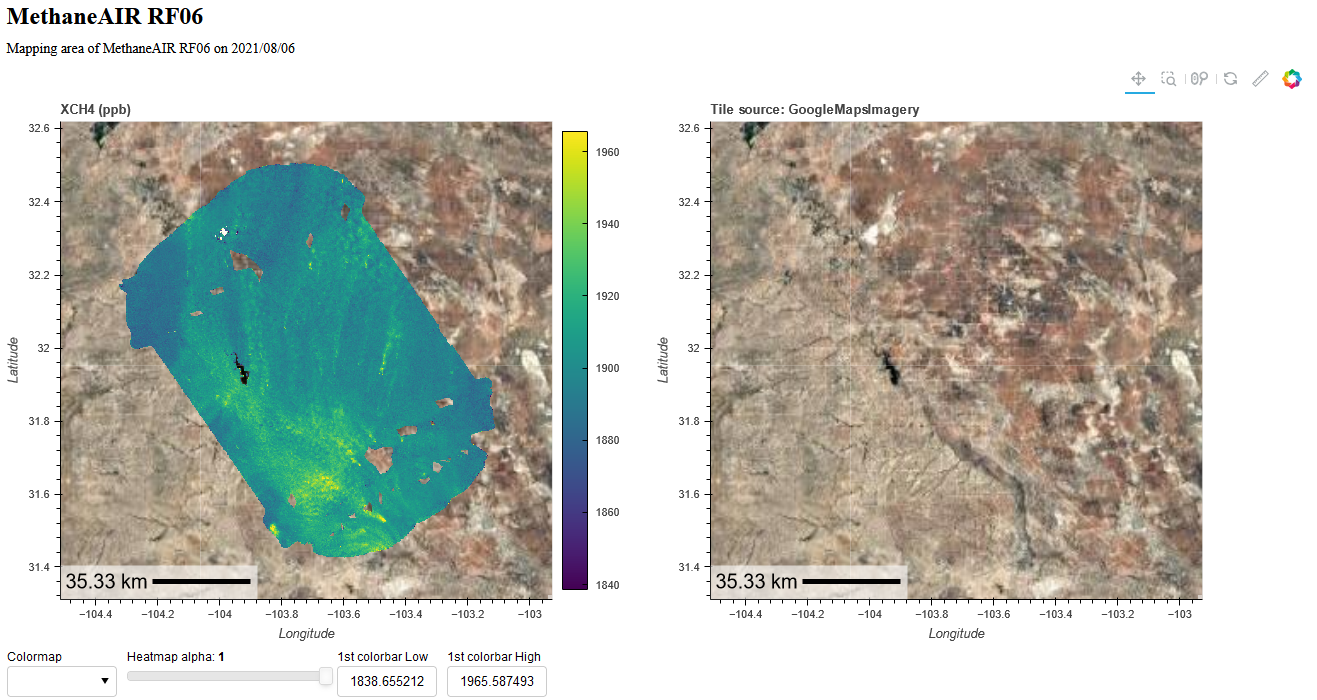

## Making a layout with multiple variables plotted

In [ ]:
xch4_plot = show_map(
    lon,
    lat,
    xch4,
    background_tile_list=[GoogleImagery],
    width=450,
    height=350,
    title="XCH4 (ppb)",
)

In [ ]:
albedo_plot = show_map(
    lon,
    lat,
    albedo,
    background_tile_list=[GoogleImagery],
    width=450,
    height=350,
    title="Albedo",
    single_panel=True,
)

In [ ]:
layout = hv.Layout([xch4_plot,albedo_plot]).cols(2)

In [ ]:
save_static_plot_with_widgets(
    "RF06_L3_map.html",
    layout,
    layout_title = "MethaneAIR RF06",
    layout_details = "Mapping area of MethaneAIR RF06 on 2021/08/06"
)

In [ ]:
HTML("RF06_L3_map.html")

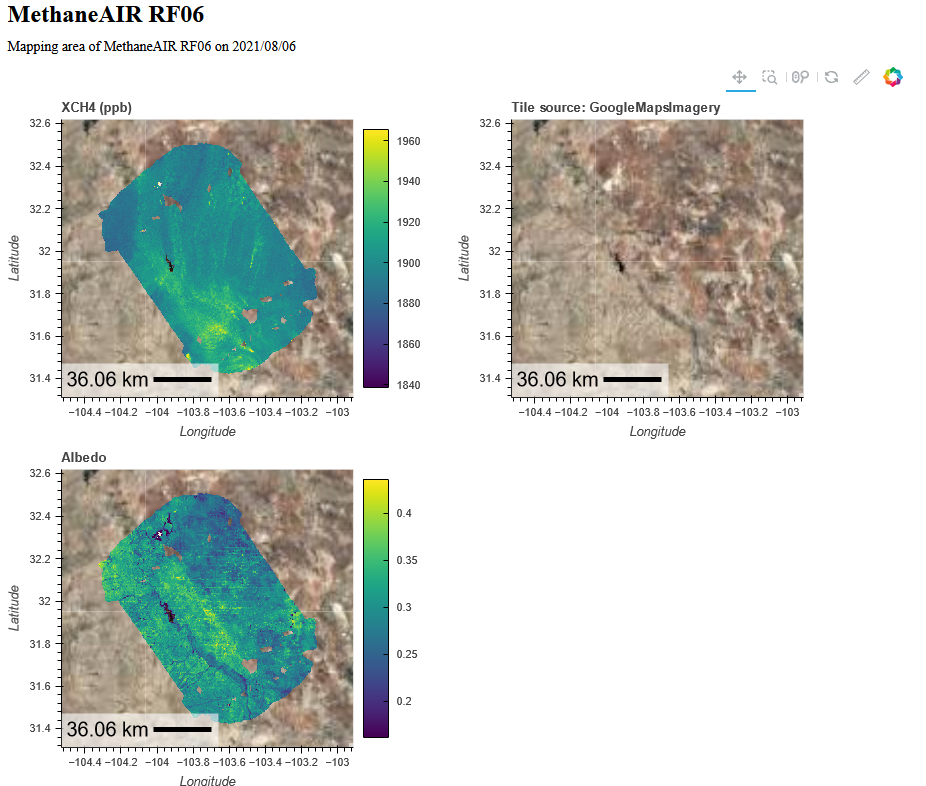

# Example with a MethaneSAT target

In [ ]:
msat_l3 = msat_collection(["MethaneSAT_L3_regrid_20240911T203025_20240911T203057_dpp.nc"])

In [ ]:
lon = msat_l3.pmesh_prep("lon").compute()
lat = msat_l3.pmesh_prep("lat").compute()
xch4 = msat_l3.pmesh_prep("xch4").compute()
albedo = msat_l3.pmesh_prep("albedo").compute()

In [ ]:
xch4_plot = show_map(
    lon,
    lat,
    xch4,
    background_tile_list=[GoogleImagery],
    width=450,
    height=350,
    title="XCH4 (ppb)",
)

In [ ]:
albedo_plot = show_map(
    lon,
    lat,
    albedo,
    background_tile_list=[GoogleImagery],
    width=450,
    height=350,
    title="Albedo",
    single_panel=True,
)

In [ ]:
layout = hv.Layout([xch4_plot,albedo_plot]).cols(2)

In [ ]:
save_static_plot_with_widgets(
    "MSAT_Permian.html",
    layout,
    layout_title = "MethaneSAT Permian 2024/09/11",
)

In [ ]:
HTML("MSAT_Permian.html")

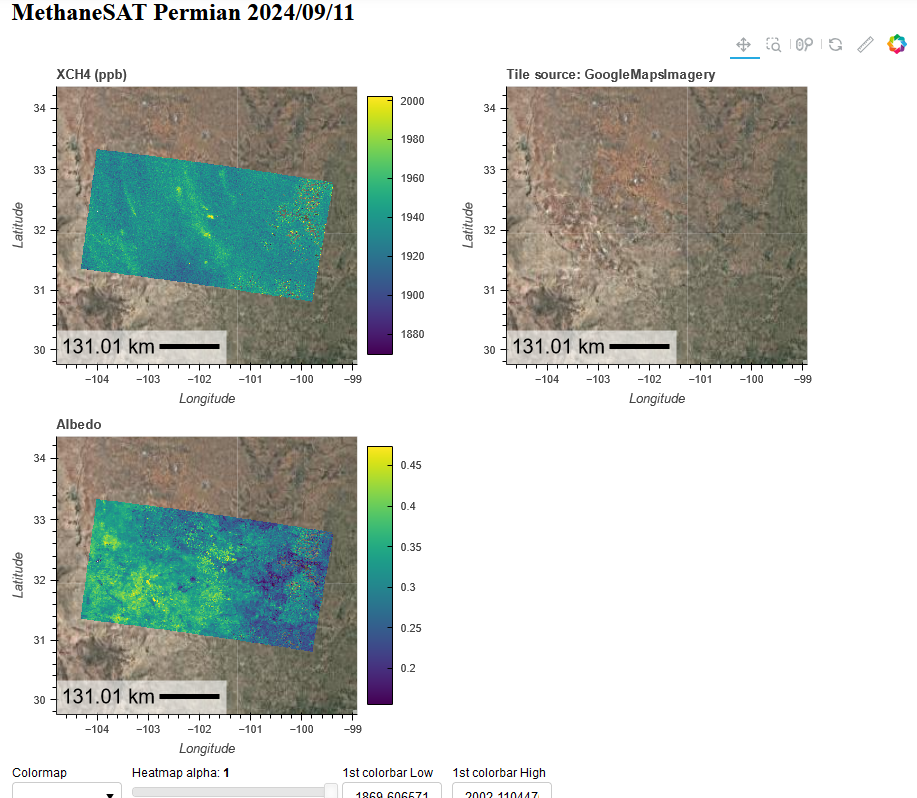